# Stationarity

In this activity, you will stationarize a non-stationary time series. The dataset is a time series of Shopify stock prices in CAD, from early 2017 through late 2019.

In [1]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read CSV, parse dates, and set index
csvpath = Path('../Resources/shopify.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')

In [3]:
# Display top rows
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03 16:00:00,58.22,58.40,56.60,57.65,83632
2017-01-04 16:00:00,57.96,59.02,57.15,58.86,84716
2017-01-05 16:00:00,58.80,63.43,58.50,63.16,268340
2017-01-06 16:00:00,62.98,63.05,60.34,62.03,198457
2017-01-09 16:00:00,62.12,62.86,61.75,62.54,79175


<AxesSubplot:xlabel='Date'>

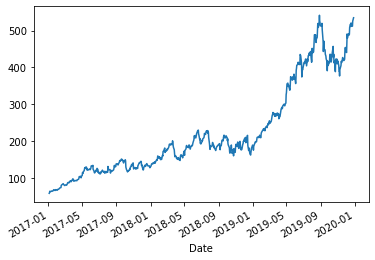

In [4]:
# Plot closing price
df.Close.plot()

# Test stationarity with the Augmented Dickey-Fuller test 

In [5]:
# Apply the Augmented Dickey-Fuller test to determine if the above is stationary
from statsmodels.tsa.stattools import adfuller
adfuller(df.Close)

(0.5441995601733082,
 0.9861563642337198,
 11,
 738,
 {'1%': -3.4392418578608983,
  '5%': -2.86546426916434,
  '10%': -2.568859710342903},
 5005.111139326224)

# Non-Stationary to Stationary Techniques

### Technique 1: Applying a Percent Change

In [6]:
# Convert to stationary data by taking the `pct_change` of the Closing prices.
df['Returns'] = df.Close.pct_change()

In [8]:
# Drop the NaNs created by the pct_change function
df = df.dropna()

<AxesSubplot:xlabel='Date'>

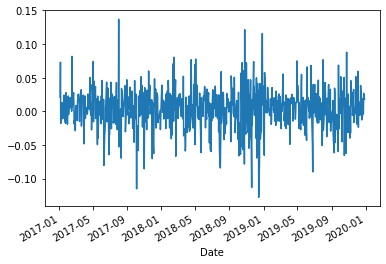

In [9]:
# Plot the returns as a line chart. 
# You should no longer see the upward trend in the data
df.Returns.plot()

### Technique 2: Applying a Diff

<AxesSubplot:xlabel='Date'>

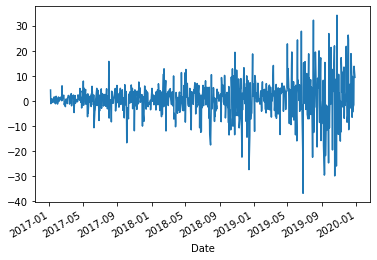

In [10]:
# Subtract the upward trend for the closing prices using the `diff()` function
df['Diff'] = df.Close.diff()

# Drop the NaNs created from the diff function
df = df.dropna()

# Plot the differences
df.Diff.plot()

## BONUS 

### Technique 3: Apply Log Diff

<AxesSubplot:xlabel='Date'>

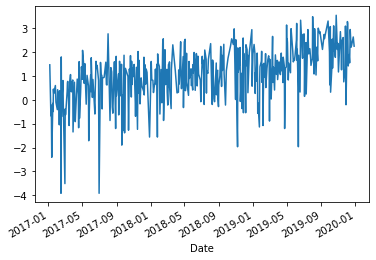

In [11]:
# Replace positive/negative inf and drop NaNs
df2 = df[df['Diff'] != 0]
df2 = df2.replace(np.inf, np.nan).replace(-np.inf, np.nan)
df2 = df2.dropna()

# Calculate log of diff and plot
df2['Log'] = np.log(df2['Diff'])
df2 = df2.dropna()
df2['Log'].plot()